In [1]:
import pandas as pd
from prepare import Prepare
from split_get_scale import SplitGetScale
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 30

zillow = Prepare().wrangle_zillow()
sgs = SplitGetScale()

/Users/dragonzord/Documents/SchoolDocs/codeup-data-science/exercises/methodologies1/clustering/zillow_clustering/prepare.py:11: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  df = Acquire().get_zillow_data()


In [3]:
train, validate, test = sgs.split(zillow)

In [3]:
# function to get the plot of inertia against K value
def get_k_val_from_elbow(df):
    '''Takes in a dataframe and a list of features to cluster on and returns a plot of K value against the inertia'''
    output = {}

    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        output[k] = kmeans.inertia_

    ax = pd.Series(output).plot(figsize=(13, 7))
    ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 20), title='The elbow method for determining k')
    ax.grid()

### Creating clusters based on location features 

In [4]:
## GET TRAIN, VALIDATE, TEST FOR CLUSTERING
# creating the list of the features to cluster on
loc_features = ['latitude', 'longitude', 'region_id_zip', 'fips']
clusters_train = train[loc_features]
clusters_validate = validate[loc_features]
clusters_test = test[loc_features]

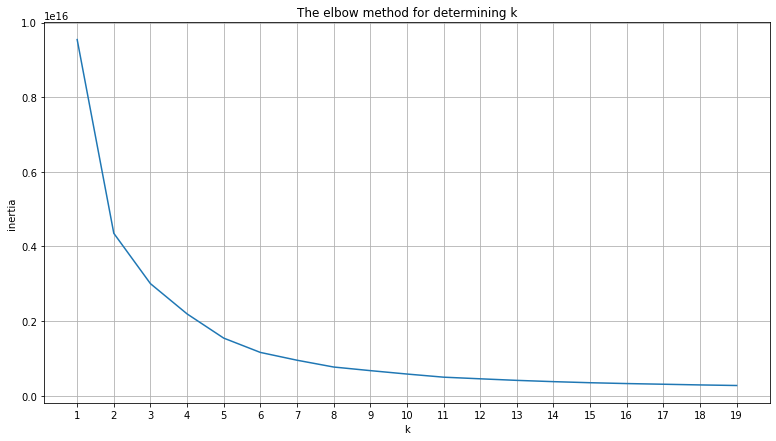

In [5]:
# lets plot the k and inertia
get_k_val_from_elbow(clusters_train)

### Use K = 4

In [6]:
# creating the object
kmeans1 = KMeans(n_clusters=4, max_iter=500)

# fitting the object
kmeans1.fit(clusters_train)

#predicting using the kmeans object
y_kmeans1 = kmeans1.predict(clusters_train)
y_kmeans1 

array([3, 1, 3, ..., 2, 1, 0], dtype=int32)

array([[ 3.37124789e+07, -1.17793331e+08,  9.69589960e+04,
         6.05738999e+03],
       [ 3.42691334e+07, -1.18392403e+08,  9.64843668e+04,
         6.03790896e+03],
       [ 3.42316134e+07, -1.18985570e+08,  9.68673993e+04,
         6.10672199e+03],
       [ 3.39488118e+07, -1.18145348e+08,  9.63795234e+04,
         6.03931134e+03]])

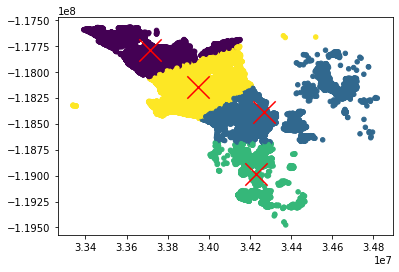

In [7]:
# ploting the centroids
plt.scatter(clusters_train.iloc[:, 0], clusters_train.iloc[:, 1], c=y_kmeans1, s=20, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [8]:
# Adding our prediction to the DataFrame
train['loc_cluster'] = y_kmeans1

In [9]:
train.head(1)

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county,loc_cluster
13527,11770180,1.0,2,941.0,6037,34012117.0,-118247150.0,6338.0,6.037228e+07,12447,3101,95992,1909,32430.0,72079.0,2016,39649.0,1025.09,6.037228e+13,-0.091213,2017-03-01,Los Angeles,3


### Viz and Stats Test for Location Clusters

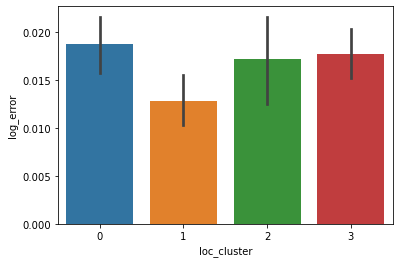

In [10]:
sns.barplot(x=train["loc_cluster"], y=train["log_error"]);

<p>H_o: all 4 groups have the same population mean</p>
<p>H_a: at least 1 has different mean</p>
<p>Signifcance Level: 0.05</p>

In [11]:
from scipy.stats import f_oneway

loc_cluster_0 = train["log_error"][train["loc_cluster"] == 0]
loc_cluster_1 = train["log_error"][train["loc_cluster"] == 1]
loc_cluster_2 = train["log_error"][train["loc_cluster"] == 2]
loc_cluster_3 = train["log_error"][train["loc_cluster"] == 3]

f, p = f_oneway(loc_cluster_0, loc_cluster_1, loc_cluster_2, loc_cluster_3, axis=0)
f, p

(3.367482899509231, 0.017722956615364847)

P-value < alpha, therefore reject null and say that at least one has a different mean

### Creating clusters based on house features 

In [4]:
train_scaled, val_scaled, test_scaled, _ = sgs.scale(train.drop(columns=["transaction_date", "county"]), validate.drop(columns=["transaction_date", "county"]), test.drop(columns=["transaction_date", "county"]))

In [6]:
#  features that will be used are 'bathroom_count', 'bedroom_count','home_size_square_feet', 'lot_size_square_feet'
home_features = ['bathroom_count', 'bedroom_count', 'home_size_square_feet', 'lot_size_square_feet']
clusters_train_scaled = train_scaled[home_features]
clusters_validate_scaled = val_scaled[home_features]
clusters_test_scaled = test_scaled[home_features]

# plotting k and inertia
#get_k_val_from_elbow(clusters_train_scaled)

### Use K = 4

In [7]:
# creating the object
kmeans2 = KMeans(n_clusters=4, max_iter=500)

# fitting the object
kmeans2.fit(clusters_train_scaled)

#predicting using the kmeans object
y_kmeans2 = kmeans2.predict(clusters_train_scaled)
y_kmeans2

array([[-0.06165535, -0.73483867, -0.47924254,  5.8931651 ],
       [-0.01719441,  0.07232771, -0.19874405, -0.10561508],
       [ 0.7734003 ,  0.9809882 ,  0.91195619, -0.14345085],
       [-0.90870192, -0.99047795, -0.76962077, -0.03852808],
       [ 2.55300923,  1.68591269,  2.84328598, -0.07694334]])

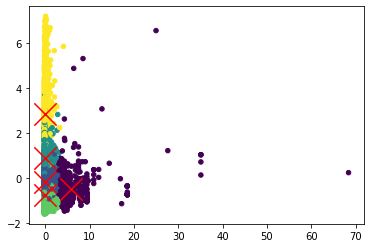

In [15]:
# ploting the centroids 
plt.scatter(clusters_train_scaled.iloc[:, 3], clusters_train_scaled.iloc[:, 2], c=y_kmeans2, s=20, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 2], c='red', s=500, alpha=1, marker = 'x')
centers

In [1]:
# Appending cluster into the DataFrame
train_scaled['home_features_cluster'] = y_kmeans2

NameError: name 'y_kmeans2' is not defined

In [17]:
train_scaled.head()

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,home_features_cluster
0,-0.552676,-1.374770,-1.016105,-0.923448,-0.591003,0.034850,-0.150808,-0.205078,-0.598829,-0.453468,0.738274,-0.165205,-2.616297,-0.839328,-0.861983,0.0,-0.748010,-0.879335,-0.598912,-0.650932,3
1,-0.948081,0.825998,-0.009982,-0.198855,-0.591003,0.746481,-0.658501,-0.195472,-0.603726,-0.453468,0.738274,-0.051505,1.662733,-0.073310,-0.219239,0.0,-0.265357,-0.224052,-0.603809,-0.289254,1
2,-0.561756,-1.374770,2.002265,1.470400,-0.591003,0.168959,-0.330048,-0.144468,-0.599556,-0.453468,0.738274,-0.163050,-2.092335,-0.778634,-0.847501,0.0,-0.760408,-0.847298,-0.599639,0.257985,2
3,-0.937987,-0.274386,-2.022229,-0.537155,-0.591003,0.551807,-0.591864,-0.078775,-0.602936,-0.453468,0.738274,-0.042075,0.396490,-0.158325,0.014065,0.0,0.104379,-0.004310,-0.603019,-0.229964,3
4,-0.939757,0.825998,-0.009982,0.366538,-0.591003,0.588985,-0.608701,-0.218250,-0.603843,-0.453468,0.738274,-0.041266,-0.302128,0.067121,-0.331490,0.0,-0.496581,-0.335410,-0.603926,0.189832,1


### Viz and Stats Test for Home Features Clusters

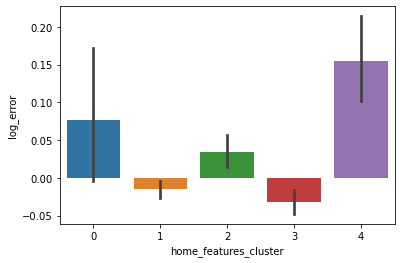

In [19]:
sns.barplot(x=train_scaled["home_features_cluster"], y=train_scaled["log_error"]);

<p>H_o: all 5 groups have the same population mean</p>
<p>H_a: at least 1 has different mean</p>
<p>Signifcance Level: 0.05</p>

In [20]:
homef_cluster_0 = train_scaled["log_error"][train_scaled["home_features_cluster"] == 0]
homef_cluster_1 = train_scaled["log_error"][train_scaled["home_features_cluster"] == 1]
homef_cluster_2 = train_scaled["log_error"][train_scaled["home_features_cluster"] == 2]
homef_cluster_3 = train_scaled["log_error"][train_scaled["home_features_cluster"] == 3]
homef_cluster_4 = train_scaled["log_error"][train_scaled["home_features_cluster"] == 4]

f, p = f_oneway(homef_cluster_0, homef_cluster_1, homef_cluster_2, homef_cluster_3, homef_cluster_4)
f, p

(23.410446468850697, 2.3165211571139305e-19)

P-value < alpha, therefore reject null and say that at least one has a different mean

### Parameters for Tax Clusters

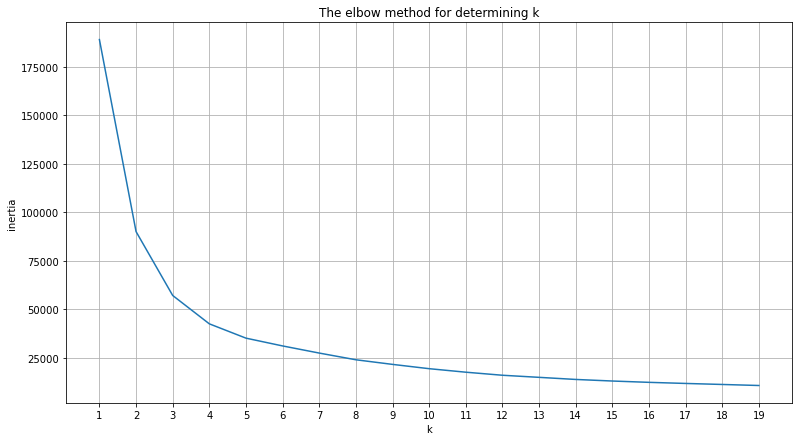

In [21]:

tax_features = ['structure_tax_value_price', 'tax_value_dollar_count', 'land_tax_value_price', 'tax_amount']
clusters_train_scaled = train_scaled[tax_features]
clusters_validate_scaled = val_scaled[tax_features]
clusters_test_scaled = test_scaled[tax_features]

get_k_val_from_elbow(clusters_train_scaled)

### Use K = 5

In [22]:
# creating the object
kmeans3 = KMeans(n_clusters=5, max_iter=500)

# fitting the object
kmeans3.fit(clusters_train_scaled)

#predicting using the kmeans object
y_kmeans3 = kmeans3.predict(clusters_train_scaled)
y_kmeans3

array([0, 2, 0, ..., 2, 3, 2], dtype=int32)

array([[-0.50184391, -0.62060119, -0.59343816, -0.61512539],
       [ 2.3152848 ,  2.57222934,  2.33357873,  2.57380872],
       [-0.04935658, -0.00648383,  0.01743738, -0.01013366],
       [ 0.75928239,  0.88242514,  0.81930586,  0.87861939],
       [ 4.84292539,  5.83739638,  5.51622622,  5.77901441]])

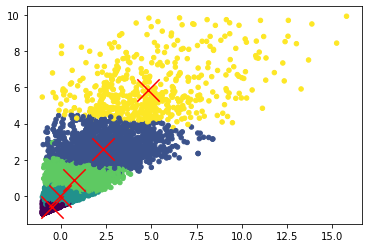

In [23]:
# lets plot the centroids

plt.scatter(clusters_train_scaled.iloc[:, 0], clusters_train_scaled.iloc[:, 1], c=y_kmeans3, s=20, cmap='viridis')
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [24]:
# Appending the clusters into DataFrame
train_scaled['tax_features_cluster'] = y_kmeans3

In [25]:
train_scaled.head(1)

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,home_features_cluster,tax_features_cluster
0,-0.552676,-1.37477,-1.016105,-0.923448,-0.591003,0.03485,-0.150808,-0.205078,-0.598829,-0.453468,0.738274,-0.165205,-2.616297,-0.839328,-0.861983,0.0,-0.74801,-0.879335,-0.598912,-0.650932,3,0


### Viz and Stats Test for Tax Features Clusters

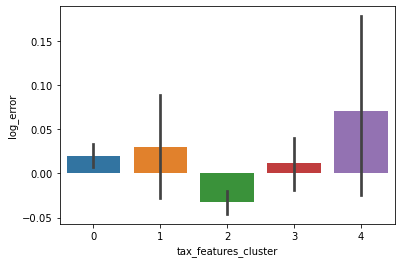

In [26]:
sns.barplot(x=train_scaled["tax_features_cluster"], y=train_scaled["log_error"]);

<p>H_o: all 5 groups have the same population mean</p>
<p>H_a: at least 1 has different mean</p>
<p>Signifcance Level: 0.05</p>

In [27]:
taxf_cluster_0 = train_scaled["log_error"][train_scaled["tax_features_cluster"] == 0]
taxf_cluster_1 = train_scaled["log_error"][train_scaled["tax_features_cluster"] == 1]
taxf_cluster_2 = train_scaled["log_error"][train_scaled["tax_features_cluster"] == 2]
taxf_cluster_3 = train_scaled["log_error"][train_scaled["tax_features_cluster"] == 3]
taxf_cluster_4 = train_scaled["log_error"][train_scaled["tax_features_cluster"] == 4]

f, p = f_oneway(taxf_cluster_0, taxf_cluster_1, taxf_cluster_2, taxf_cluster_3, taxf_cluster_4)
f, p

(8.039805798339463, 1.7835605831408834e-06)

P-value < alpha, therefore reject null and say that at least one has a different mean